In [1]:
%pwd

'/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training'

In [2]:
!pip install roboflow

from roboflow import Roboflow
import os

rf = Roboflow(api_key="<API KEY HERE>")
project = rf.workspace("robocup-9jdud").project("black-parts-panorama-image")
version = project.version(4)
dataset = version.download("sam2")

# rename dataset.location to "data"
os.rename(dataset.location, "/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/data")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to black-parts-panorama-image-4 in sam2:: 100%|██████████| 293/293 [00:00<00:00, 1025.47it/s]


In [4]:
!git clone https://github.com/facebookresearch/sam2.git

Cloning into 'sam2'...
remote: Enumerating objects: 974, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 974 (delta 237), reused 222 (delta 222), pack-reused 605 (from 1)
Receiving objects: 100% (974/974), 121.67 MiB | 11.33 MiB/s, done.
Resolving deltas: 100% (340/340), done.


In [5]:
!wget -O /scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/sam2/sam2/configs/train.yaml 'https://drive.usercontent.google.com/download?id=11cmbxPPsYqFyWq87tmLgBAQ6OZgEhPG3'

--2024-12-01 13:55:05--  https://drive.usercontent.google.com/download?id=11cmbxPPsYqFyWq87tmLgBAQ6OZgEhPG3
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.199.33, 2404:6800:4001:808::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.199.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11055 (11K) [application/octet-stream]
Saving to: ‘/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/sam2/sam2/configs/train.yaml’

/scr/user/farisfaiz 100%[===================>]  10.80K  --.-KB/s    in 0.002s  

2024-12-01 13:55:08 (4.61 MB/s) - ‘/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/sam2/sam2/configs/train.yaml’ saved [11055/11055]



In [27]:
%cd ./sam2_clonedrepo/

/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/sam2_clonedrepo


In [28]:
!pip install -e .[dev] -q

In [8]:
!cd ./checkpoints && ./download_ckpts.sh

--2024-12-01 13:57:21--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.67.181.36, 18.67.181.99, 18.67.181.91, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.67.181.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M  54.0MB/s    in 2.8s    

2024-12-01 13:57:24 (54.0 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2024-12-01 13:57:24--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.67.181.99, 18.67.181.91, 18.67.181.104, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.67.181.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184416285 (176M) [applic

In [10]:
# Script to rename roboflow filenames to something SAM 2.1 compatible.
# It may be possible to remove this step by tweaking sam2/sam2/configs/train.yaml.
import os
import re

# Define the folder containing the files to rename
FOLDER = "/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/data/train"

def rename_files(folder):
    try:
        # Ensure the folder exists
        if not os.path.exists(folder):
            raise FileNotFoundError(f"Specified folder does not exist: {folder}")
        
        # Get the list of files
        files = os.listdir(folder)
        if not files:
            print(f"No files found in the folder: {folder}")
            return
        
        for filename in files:
            old_path = os.path.join(folder, filename)
            # Ensure it's a file and not a directory
            if not os.path.isfile(old_path):
                print(f"Skipping non-file item: {filename}")
                continue
            
            # Replace all except the last dot with underscores
            new_filename = filename.replace(".", "_", filename.count(".") - 1)
            
            # Add a numeric suffix if the filename doesn't already have one
            if not re.search(r"_\d+\.\w+$", new_filename):
                base, ext = os.path.splitext(new_filename)
                new_filename = f"{base}_1{ext}"
            
            new_path = os.path.join(folder, new_filename)
            
            # Rename the file and report the change
            os.rename(old_path, new_path)
            print(f"Renamed: {filename} -> {new_filename}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Call the function
rename_files(FOLDER)

Renamed: image34_png.rf.6951dcc4f7ae39f0a767548e527dea8e.jpg -> image34_png_rf_6951dcc4f7ae39f0a767548e527dea8e_1.jpg
Renamed: akaze_plane_panorama_png.rf.d50101c8cf251d96b0d99097c3864caa.jpg -> akaze_plane_panorama_png_rf_d50101c8cf251d96b0d99097c3864caa_1.jpg
Renamed: orb_spherical_panorama_png.rf.0af9f464766a3fb376ef623031c65b5c.jpg -> orb_spherical_panorama_png_rf_0af9f464766a3fb376ef623031c65b5c_1.jpg
Renamed: orb_plane_panorama_png.rf.70c388f96187313682d51fc4ab96e90c.jpg -> orb_plane_panorama_png_rf_70c388f96187313682d51fc4ab96e90c_1.jpg
Renamed: sift_spherical_panorama_png.rf.f02bebd1216d3f57fcd1ae52e71b2550.jpg -> sift_spherical_panorama_png_rf_f02bebd1216d3f57fcd1ae52e71b2550_1.jpg
Renamed: image27_png.rf.cf45cb05c2026f29d8bc4cbe64cb9c27.json -> image27_png_rf_cf45cb05c2026f29d8bc4cbe64cb9c27_1.json
Renamed: orb_spherical_panorama_png.rf.c5619832518a148805bc206308bc3d5d.json -> orb_spherical_panorama_png_rf_c5619832518a148805bc206308bc3d5d_1.json
Renamed: sift_mercator_panoram

In [3]:
%cd sam2

/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/sam2


In [4]:
%ls

CODE_OF_CONDUCT.md  README.md           docker-compose.yaml  setup.py
CONTRIBUTING.md     SAM_2.egg-info/     notebooks/           tools/
INSTALL.md          assets/             pyproject.toml       training/
LICENSE             backend.Dockerfile  sam2/
LICENSE_cctorch     checkpoints/        sam2_logs/
MANIFEST.in         demo/               sav_dataset/


In [5]:
!python training/train.py -c 'configs/train.yaml' --use-cluster 0 --num-gpus 2

###################### Train App Config ####################
scratch:
  resolution: 1024
  train_batch_size: 1
  num_train_workers: 10
  num_frames: 1
  max_num_objects: 3
  base_lr: 5.0e-06
  vision_lr: 3.0e-06
  phases_per_epoch: 1
  num_epochs: 40
dataset:
  img_folder: /scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/data/train
  gt_folder: /scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training/data/train
  multiplier: 2
vos:
  train_transforms:
  - _target_: training.dataset.transforms.ComposeAPI
    transforms:
    - _target_: training.dataset.transforms.RandomHorizontalFlip
      consistent_transform: true
    - _target_: training.dataset.transforms.RandomAffine
      degrees: 25
      shear: 20
      image_interpolation: bilinear
      consistent_transform: true
    - _target_: training.dataset.transforms.RandomResizeAPI
      sizes: ${scratch.resolution}
      square: tr

In [ ]:
%load_ext tensorboard
%tensorboard --bind_all --logdir ./sam2_logs/

In [14]:
%cd ../..

/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training


In [25]:
%pip show sam2

Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install supervision -q

In [18]:
import torch
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator
import supervision as sv
import os
import random
from PIL import Image
import numpy as np

# use bfloat16 for the entire notebook
# from Meta notebook
torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
if torch.cuda.get_device_properties(0).major >= 8:
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

parent_directory = "/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training"

checkpoint = parent_directory + "/sam2_clonedrepo/sam2_logs/configs/train.yaml/checkpoints/checkpoint.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_b+.yaml"
#model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
sam2 = build_sam2(model_cfg, checkpoint, device="cuda")
mask_generator = SAM2AutomaticMaskGenerator(sam2)

checkpoint_base = parent_directory + "/sam2_clonedrepo/checkpoints/sam2.1_hiera_base_plus.pt"
#model_cfg_base = "configs/sam2.1/sam2.1_hiera_l.yaml"
model_cfg_base = "configs/sam2.1/sam2.1_hiera_b+.yaml"
sam2_base = build_sam2(model_cfg_base, checkpoint_base, device="cuda")
mask_generator_base = SAM2AutomaticMaskGenerator(sam2_base)

In [7]:
validation_set = os.listdir(parent_directory+"/data")
validation_set

['valid', 'test', 'train', 'README.dataset.txt', 'README.roboflow.txt']

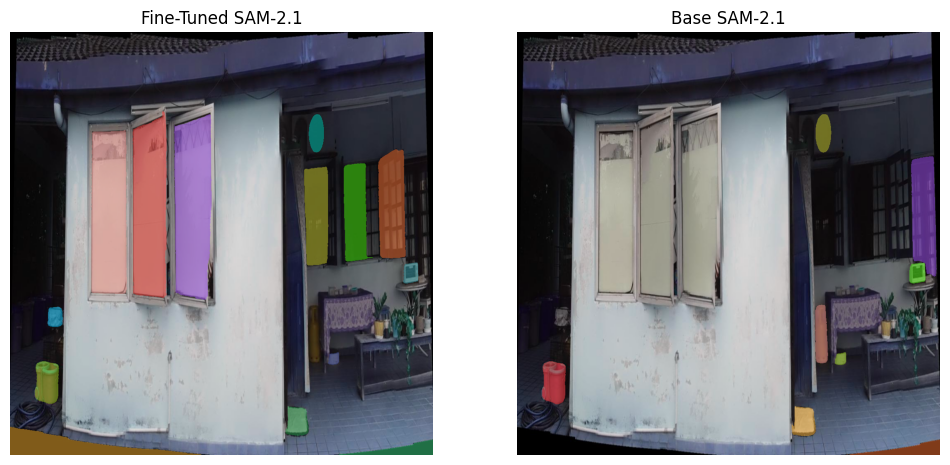

In [20]:
parent_directory = "/scr/user/farisfaiz/batch_connect/sys/jupyter/output/8c6f0e8e-3adc-4485-9aa3-dca2edc863b6/sam2.1_training"
validation_set = os.listdir(parent_directory+"/data/valid")

# choose random with .json extension
image = random.choice([img for img in validation_set if img.endswith(".jpg")])
image = os.path.join(parent_directory + "/data/valid", image)
opened_image = np.array(Image.open(image).convert("RGB"))
result = mask_generator.generate(opened_image)

detections = sv.Detections.from_sam(sam_result=result)

mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
annotated_image = opened_image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)

base_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)

base_result = mask_generator_base.generate(opened_image)
base_detections = sv.Detections.from_sam(sam_result=base_result)
base_annotated_image = opened_image.copy()
base_annotated_image = base_annotator.annotate(base_annotated_image, detections=base_detections)

sv.plot_images_grid(images=[annotated_image, base_annotated_image], titles=["Fine-Tuned SAM-2.1", "Base SAM-2.1"], grid_size=(1, 2))

In [21]:
image = random.choice([img for img in validation_set if img.endswith(".jpg")])
image = os.path.join(parent_directory + "/data/valid", image)
opened_image = np.array(Image.open(image).convert("RGB"))

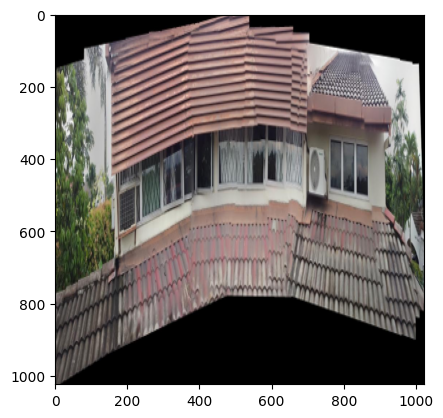

In [22]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(opened_image)
plt.show()

In [23]:
result = mask_generator.generate(opened_image)
detections = sv.Detections.from_sam(sam_result=result)
mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
annotated_image = opened_image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)

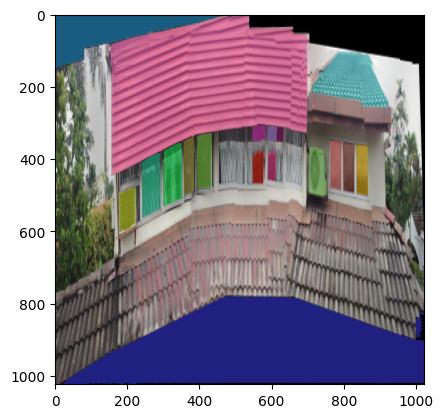

In [24]:
masked_plot = plt.imshow(annotated_image)
plt.show()

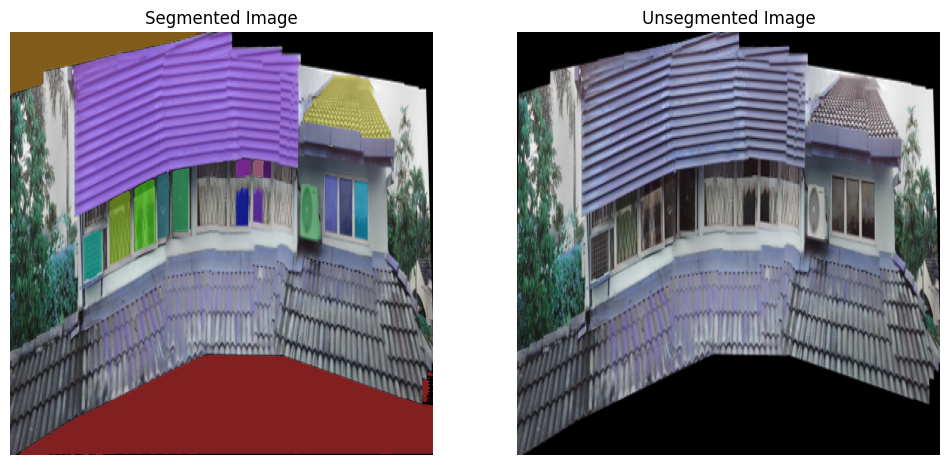

In [26]:
sv.plot_images_grid(images=[annotated_image, opened_image], titles=["Segmented Image", "Unsegmented Image"], grid_size=(1, 2))

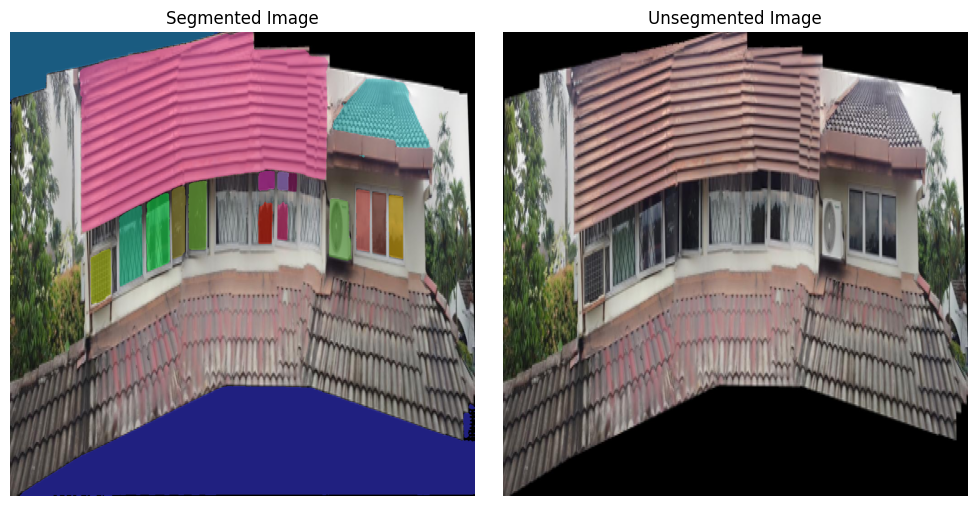

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(annotated_image)
axes[0].set_title('Segmented Image')
axes[0].axis('off')  # Hide axes for clarity

axes[1].imshow(opened_image)
axes[1].set_title('Unsegmented Image')
axes[1].axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()